In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams["figure.figsize"] = (16, 9)
plt.close("all")

In [2]:
bikes = pd.read_csv("../data/bikesharing/data.csv")
bikes["timestamp"] = pd.to_datetime(bikes["timestamp"],  format="%Y-%m-%d %H:%M:%S")
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


Column description: 

- "timestamp" - timestamp field for grouping the data
- "cnt" - the count of a new bike shares
- "t1" - real temperature in C
- "t2" - temperature in C "feels like"
- "hum" - humidity in percentage
- "windspeed" - wind speed in km/h
- "weathercode" - category of the weather
- "isholiday" - boolean field - 1 holiday / 0 non holiday
- "isweekend" - boolean field - 1 if the day is weekend
- "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

# Exercise 1) Scatter plot

a) create a figure with one axis instance. You can either use plt.figure() or use plt.subplots(). Get comfortable with both methods 

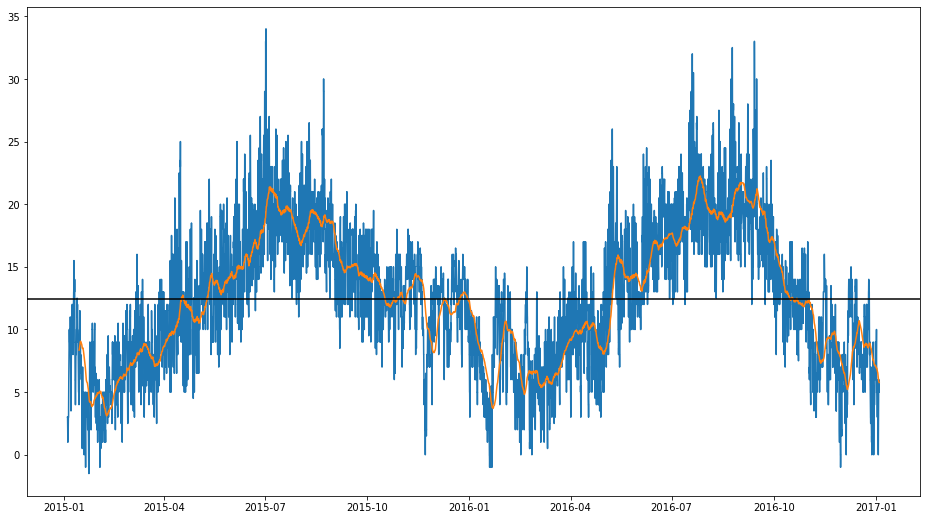

In [3]:
#plt.scatter(x=bikes["cnt"], y=bikes["t1"], alpha=.05)
plt.subplots()
plt.plot(bikes["timestamp"], bikes["t1"])
plt.plot(bikes["timestamp"], bikes["t1"].rolling(250).mean())
plt.axhline(bikes["t1"].mean(), color="k")

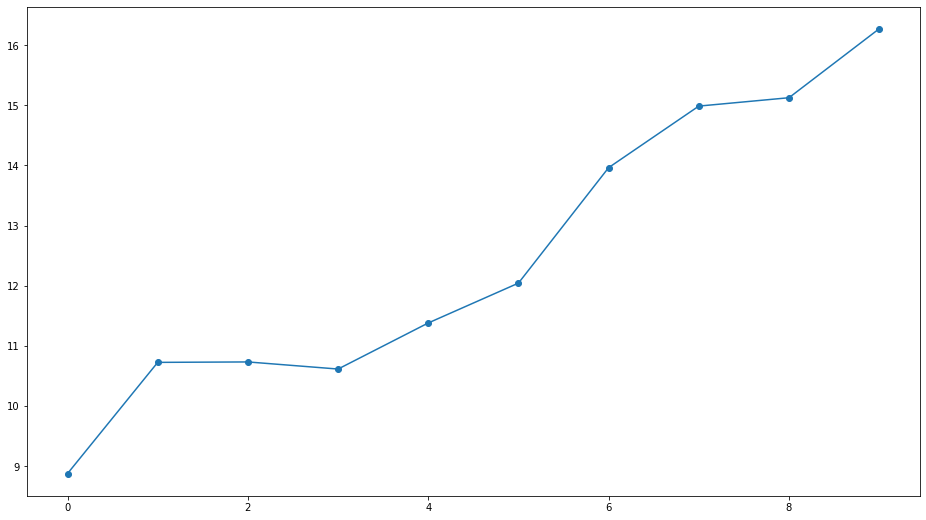

In [4]:
temp = bikes.copy()
temp["quantile"] = pd.qcut(temp["cnt"], q=10, labels=False)

temp_grouped = temp.groupby(by=["quantile"]).mean()

plt.scatter(x=temp_grouped.index, y=temp_grouped["t1"])
plt.plot(temp_grouped.index, temp_grouped["t1"])

b) create a scatter plot where you plot the humidity (hum) vs the real temperature (t1) column. HINT: you can show the figure by calling the figure instance at the end of the cell

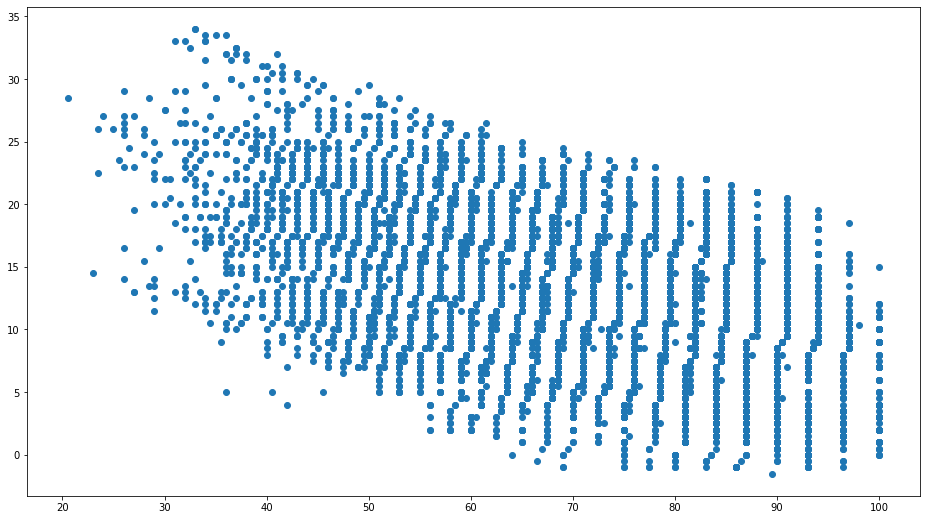

In [5]:
plt.scatter(x=bikes.hum, y=bikes.t1)

c) label the x and y axis with their respective names. HINT: use the .set_xlabel(x_name) and .set_ylabel(x_name) label methods

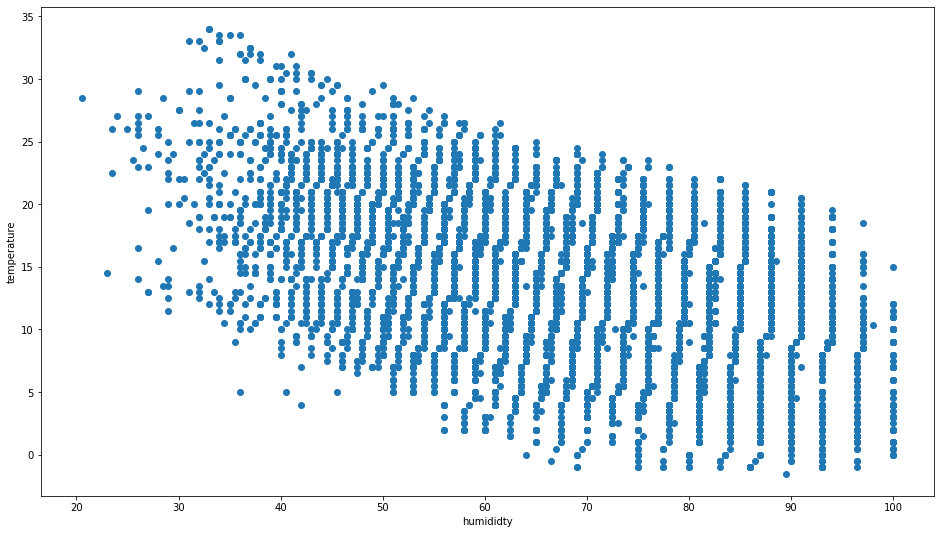

In [6]:
plt.figure()
plt.scatter(x=bikes["hum"], y=bikes["t1"])
plt.ylabel("temperature")
plt.xlabel("humididty")
plt.show()

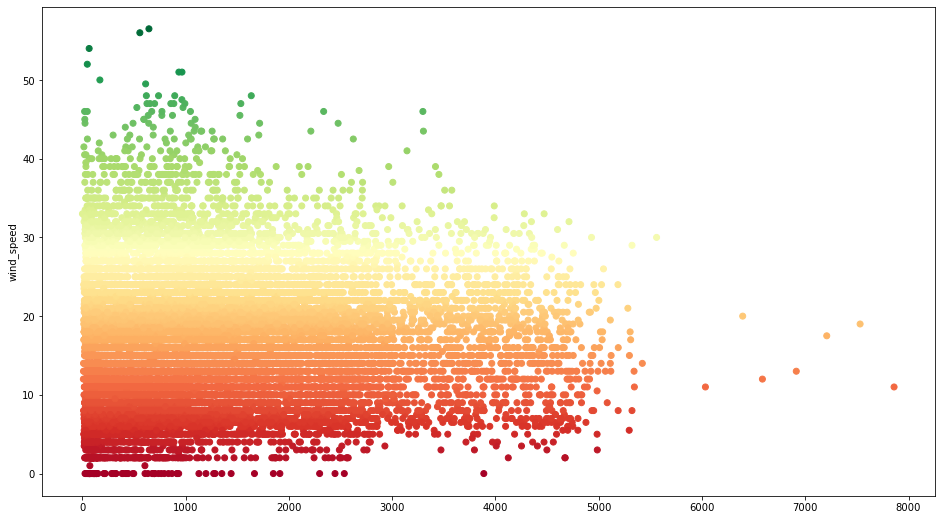

In [7]:
#plt.style.use("ggplot")

fig, ax = plt.subplots()
ax.scatter(x=bikes["cnt"], y=bikes["wind_speed"], c=bikes["wind_speed"], cmap="RdYlGn")
ax.set_ylabel("wind_speed")

plt.show()

d) give the axis instance a title. HINT: use .set_title(axis_title) 

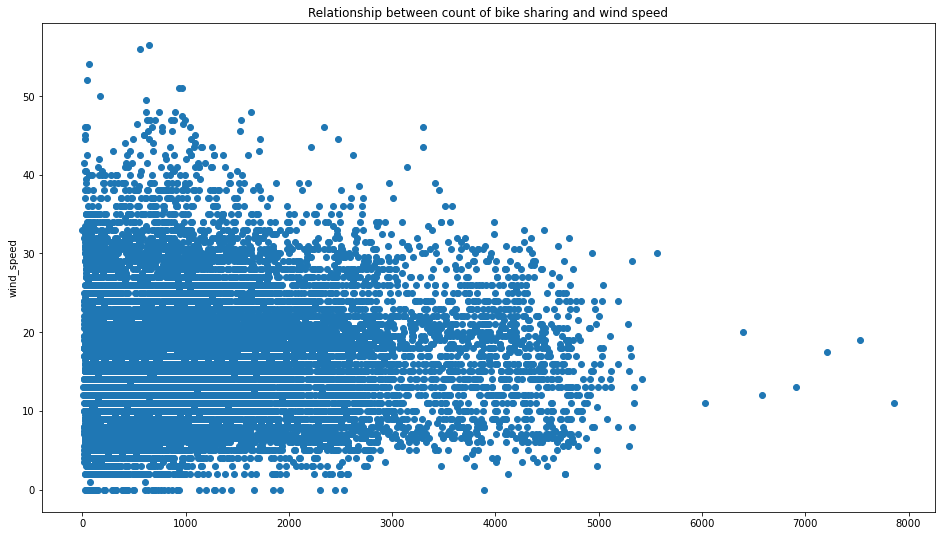

In [8]:
fig, ax = plt.subplots()
ax.scatter(x=bikes["cnt"], y=bikes["wind_speed"])
ax.set_ylabel("wind_speed")
ax.set_title("Relationship between count of bike sharing and wind speed")
plt.show()

e) save your figure as a .png file. HINT: have a look at the matplotlib documentation (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)

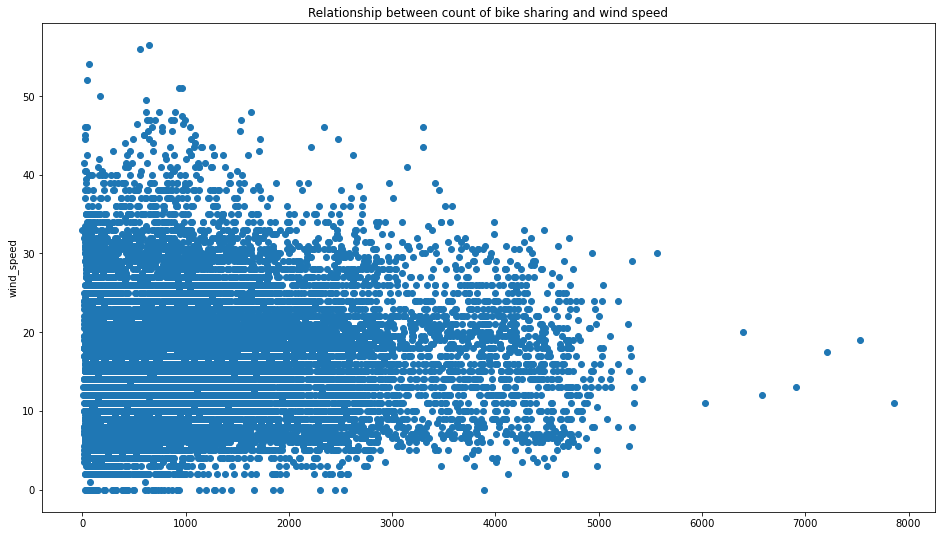

In [9]:
fig, ax = plt.subplots()
ax.scatter(x=bikes["cnt"], y=bikes["wind_speed"])
ax.set_ylabel("wind_speed")
ax.set_title("Relationship between count of bike sharing and wind speed")

fig.savefig("name.png", dpi=100)

# Exercise 2) Line plot

a) use a lineplot to visualize the count of new bike shares (cnt column) before April 2015. HINT: you need to subset the dataframe by using the timestamp column 

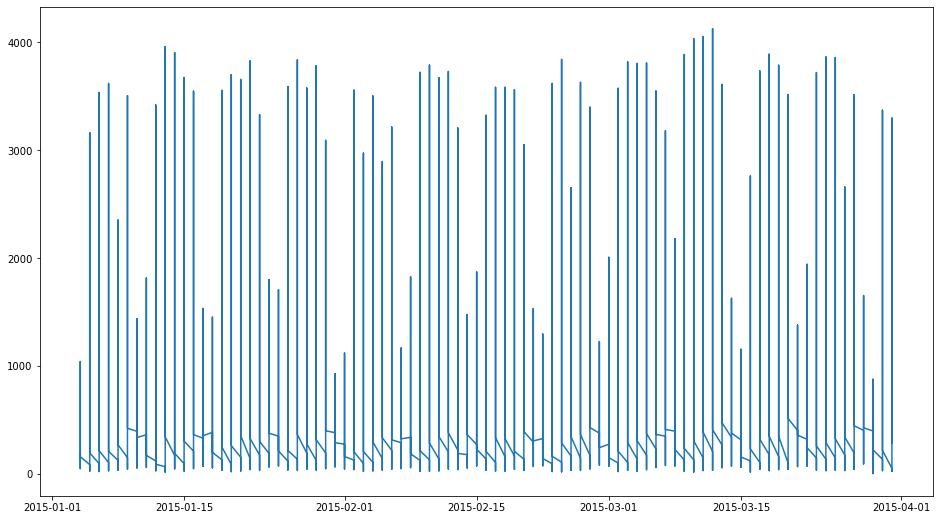

In [10]:
df = bikes.copy()

mask = df["timestamp"] < pd.Timestamp("2015-04-01")

df = df[mask]

fig, ax = plt.subplots()

ax.plot(df["timestamp"].dt.date, df["cnt"])

b) place a red marker on each point where the respective timestamp belongs to the weekend (is_weekend == 1)
1. identify the rows where is_holiday == 1 (i.e. create a mask)
2. use a scatter plot to visualize the points that are observed on the weekend. HINT: (x=timestamp, y=cnt) and for controlling the marker size and color see (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

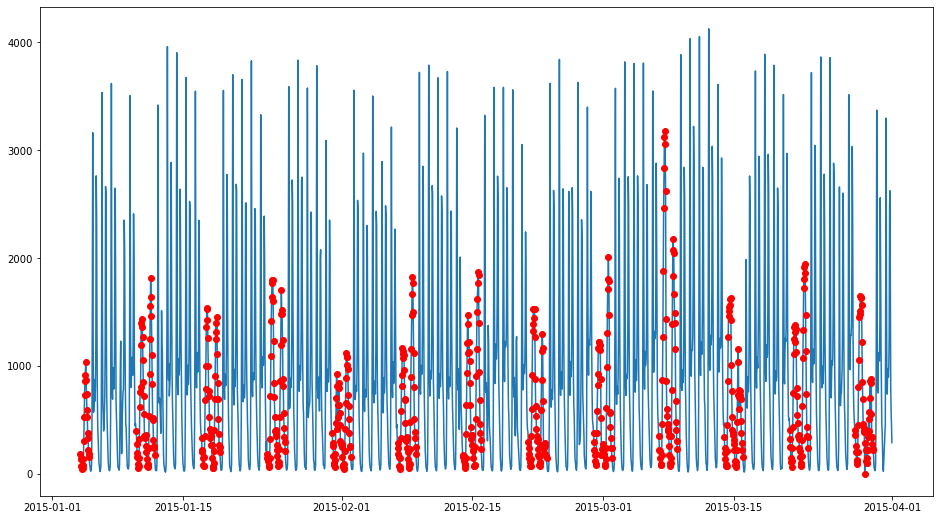

In [11]:
df2 = bikes.copy()

mask2 = (df2["is_weekend"] == 1.0) & (df2["timestamp"] < pd.Timestamp("2015-04-01"))

df2 = df2[mask2]

fig, ax = plt.subplots()

ax.scatter(df2["timestamp"], df2["cnt"], c="#ff0000", zorder=2)

ax.plot(df["timestamp"], df["cnt"], zorder=1)

c) what happens if you use .plot(...) instead of .scatter(...) as in b). HINT: recreate the figure that you created in exercise 2a)

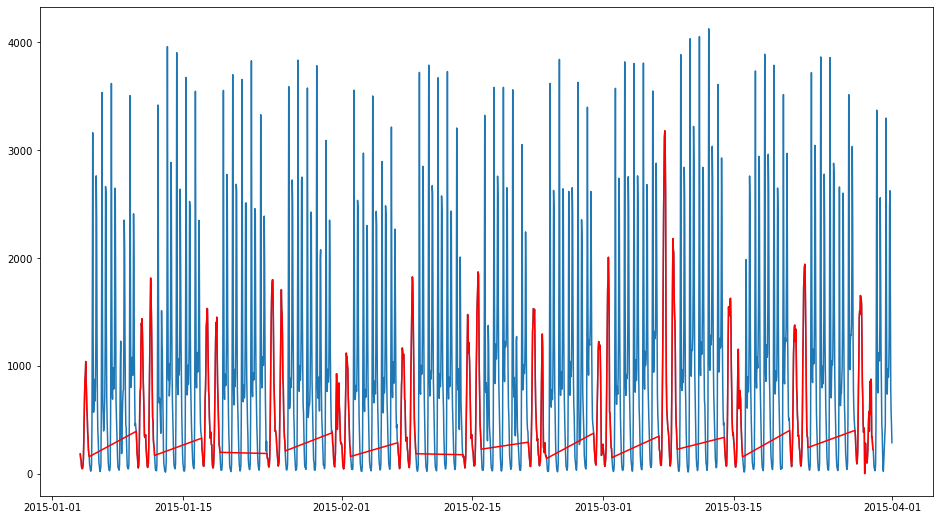

In [12]:
df2 = bikes.copy()

mask2 = (df2["is_weekend"] == 1.0) & (df2["timestamp"] < pd.Timestamp("2015-04-01"))

df2 = df2[mask2]

fig, ax = plt.subplots()

ax.plot(df["timestamp"], df["cnt"], zorder=1)
ax.plot(df2["timestamp"], df2["cnt"], c="#ff0000", zorder=2)